In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm, kstest, levy_stable

In [ ]:
def plot_traj(time, X, H, process_name):
  """
  Function to plot several given trajectories of the process

  params
  ------
  time - list of time (list)
  X - list of processes (list)
  H - self-similarity index (float)
  process_name - name of the process (str)
  """
  fig, axes = plt.subplots(1, 3, figsize = (15, 5))

  for i in range(3):
    axes[i].set_title(f"H = {H[i]}")
    axes[i].set_xlabel("time")
    axes[i].set_ylabel("process")
    axes[i].grid()
    axes[i].plot(time, np.transpose(X[i]))

  plt.suptitle(f"Some trajectories of {process_name}")
  plt.show()

Quantile line at point $t$ of order q is defined as:
$$ P(X(t) \leq f_t(q)) = q. $$
For $H$-self similar proces we obtain:
$$ f_t(q) = t^H F^{-1}_{X(1)}(q). $$

In [ ]:
def plot_quantile_lines(time, X, H, alphas, process_name):
    """
    Function to plot quantile lines

    params
    ------
    time - list of time (list)
    X - list of processes (list)
    H - self-similarity index (float)
    alphas - order of the quantile
    process_name - name of the process (str)
    """

    n = len(X)
    fig, axes = plt.subplots(1,n,figsize=(15,5))

    for i in range(n):
        for j, a in enumerate(alphas):
            quantiles = np.quantile(X[i],a,axis=0)
            axes[i].plot(time, quantiles, label = rf"$\alpha$ = {a}")
        axes[i].set_title(f"H = {H[i]}")
        axes[i].set_xlabel("time")
        axes[i].set_ylabel("quantiles")
        axes[i].grid()
        axes[i].legend()


    plt.suptitle(f"Quantile lines for {process_name}")
    plt.show()

$ EAMSD(\tau) = \mathbb{E}[X(\tau) - X(0)]^2 $

Estimator:

$ \displaystyle EAMSD(\tau) = \frac{1}{N} \sum_{k=1}^{N} (x_k(\tau) - x_k(0))^2 $

In [ ]:
def eamsd(tau,X):
    """Function to calculate ensemble-averaged mean square displacement"""
    X = np.array(X)
    return np.mean((X[:,tau] - X[:,0])**2)

$ \displaystyle  TAMSD(T,\tau) = \frac{1}{T-\tau} \int_0^{T-\tau} (X(t_0 + \tau) - X(t_0))^2 \operatorname{d}t_0$

Estimator:

$ \displaystyle TAMSD(k,\tau) = \frac{1}{n+1-\tau}\ \sum_{t_0=0}^{n-\tau} \left(x_k(t_0 + \tau) - x_k(t_0)\right)^2 $

In [ ]:
def tamsd(tau,X):
    """Function to calculate time-averaged mean square displacement"""
    n = X.size
    windows = []
    for t0 in range(n-tau):
        windows.append((X[t0+tau] - X[t0])**2)
    return np.sum(windows)/(n+1-tau)

$ \displaystyle  EATAMSD(\tau) = \mathbb{E}[TAMSD(k,\tau)]  $

Estimator:

$ \displaystyle EATAMSD(\tau) = \frac{1}{N} \sum_{k=1}^{N} TAMSD(k,\tau)$

In [ ]:
def eatamsd(tau,X):
    """Function to calculate ensemble-averaged TAMSD"""
    X = np.array(X)
    tamsd_list = []
    for k in range(X.shape[0]):
        tamsd_list.append(tamsd(tau,X[k,:]))
    return np.mean(tamsd_list)

In [ ]:
def plot_msd(X,H,process_name):
    """
    Funtion to plot differnt types of mean square displacement

    params
    ------
    X - list of processes (list)
    H - self-similarity index (float)
    process_name - name of the process (str)
    """
    n = len(X)
    fig, axes = plt.subplots(1, n, figsize = (15, 5))

    tau = np.arange(0, 100)

    for i in range(n):

        eamsd_list = []
        eatamsd_list = []
        for t in tau:
            eamsd_list.append(eamsd(t,X[i]))
            eatamsd_list.append(eatamsd(t,X[i]))

        axes[i].plot(tau,eamsd_list,label="eamsd")
        axes[i].plot(tau,eatamsd_list,label="eatamsd")

        for k in range(5):
            tamsd_list = []
            for t in tau:
                Y = np.array(X[i])
                tamsd_list.append(tamsd(t,Y[k,:]))
            if k == 0:
                axes[i].scatter(tau,tamsd_list,c='g',s=0.5,label="tamsd")
            else:
                axes[i].scatter(tau,tamsd_list,c='g',s=0.5)

        axes[i].set_title(f"H = {H[i]}")
        axes[i].set_xlabel("tau")
        axes[i].grid(True)
        axes[i].legend()

    plt.suptitle(f"Mean square displacement for {process_name}")
    plt.show()

In [ ]:
def plot_variance(time, X, H, process_name):
  """
  Function to calculate variance in time and plot it

  params
  ------
  time - list of time (list)
  X - list of processes (list)
  H - self-similarity index (float)
  process_name - name of the process (str)
  """
  var = []
  for x in X:
    var.append(np.var(x, axis = 0))

  fig, axes = plt.subplots(1, 1, figsize = (8, 5))
  axes.set_xlabel("time")
  axes.set_ylabel("variance")
  axes.grid()
  color_map = ['r', 'b', 'g']
  for i, h in enumerate(H):
    axes.plot(time, var[i], label = f"H = {h}", color = color_map[i], alpha = 0.5)
    if process_name == "Fractional Brownian motion":
      axes.plot(time, time**(2*h), "--" , label = f"Theoretical case with H = {h}", color = color_map[i])
    elif process_name == "Fractional Ornstein-Uhlenbeck":
      axes.plot(time, np.ones(len(time)), "--" , label = f"Theoretical case with H = {h}", color = color_map[i])
  plt.suptitle(f"Variance in time for {process_name}")
  plt.legend()
  plt.show()

Process is self similar if:
$$ \forall_{c>0} \quad X(ct) \stackrel{d}{=} c^H X(t).$$

In [ ]:
def self_similar(time, X, H, process_name):
  """
  Function to calculate process X_1 = t^H * X(1). Draw histograms for X and X_1.

  params
  ------
  time - time (int)
  X - list of processes (list)
  H - self-similarity index (float)
  process_name - name of the process (str)
  """
  X_1 = []
  for i, h in enumerate(H):
    X_1.append(time**h * X[i][:,1])

  fig, axes = plt.subplots(1, 3, figsize = (15, 5))

  for i in range(3):
    axes[i].set_title(f"H = {H[i]}")
    # axes[i].set_xlabel("time")
    axes[i].set_ylabel("F")
    axes[i].hist(X[i][:,time], alpha = 0.5, bins = 15, density = True, label = "X(t)")
    axes[i].hist(X_1[i], alpha = 0.5, bins = 15, density = True, label = r"$t^H$ X(1)")
    axes[i].legend()

  plt.suptitle(f"Histograms of {process_name}")
  plt.show()

In [ ]:
def compare_with_normal(t,X,H,sigmas):
    """
    Function to compare with normal distribution

    params
    ------
    t - time (int)
    X - list of processes (list)
    H - self-similarity index (float)
    sigmas- standard deviations of normal distribution (list)
    """
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    print("P value for KS test:")
    for i in range(3):
        Y = X[i][:,t]
        x = np.linspace(min(Y),max(Y),1000)
        print(f"H = {H[i]}: {kstest(Y,np.random.normal(0,sigmas[i],len(Y))).pvalue}")
        axes[i].hist(Y,density=True, alpha=0.75, label= "emirical")
        axes[i].plot(x,norm.pdf(x,0,sigmas[i]),label = "theoretical")
        axes[i].set_title(f"H = {H[i]}")
        axes[i].legend()
    plt.suptitle(f"The distribution of the process at t = {t}")
    plt.show()

# Fractional Brownian motion

We will simulate fractional Brownian motion using Cholesky decomposition:
$$X = L\cdot Z,$$
where $Z$ - matrix of independent normal random variables, $L$ - lower triangular matrix obtained by applying Cholesky decomposition to the covariance matrix ($\Sigma = L\cdot L^T$, $\Sigma$ - covariance matrix)

In [ ]:
def Sigma_fbm(time, H):
    """
    Function to generate covariance matrix for fBm

    params
    ------
    time - time (list)
    H - Hurst parameter (float)

    returns
    -------
    Sigma - covariance matrix for fBm
    """
    n = len(time)
    sigma = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            s = time[i]
            t = time[j]
            gamma = (s**(2*H) + t**(2*H) - np.abs(t-s)**(2*H)) / 2
            sigma[i][j] = gamma
            sigma[j][i] = gamma
    return sigma

In [ ]:
def cholesky_gen(time, Sigma, N = 1, **kwargs):
    """
    Function to generate a process for given covariance matrix
    via Cholesky decomposition

    params
    ------
    time - time (list)
    Sigma - covariance matrix
    N - number of trajectories to generate

    returns
    -------
    N trajectories of length le(time) of a process
    """

    n = len(time)
    Sigma = Sigma(time, **kwargs)
    L = cholesky(Sigma)
    Z = np.random.normal(0, 1, (n, N))
    B = np.dot(L, Z)
    return B.T

In [ ]:
n = 2**10
time = np.arange(0.01, n+0.01)

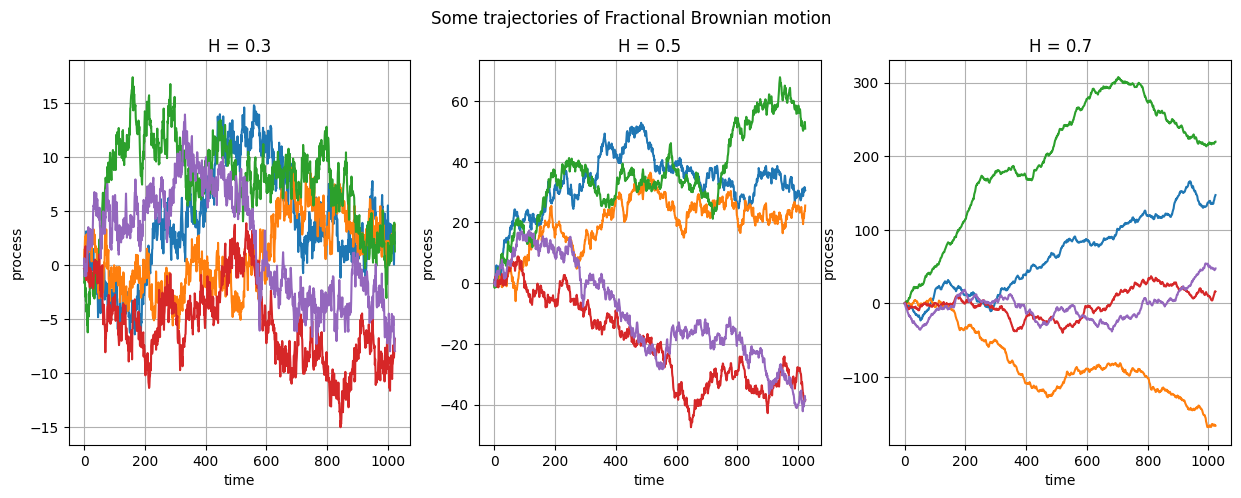

In [ ]:
N = 5
fbm = []
H = [0.3, 0.5, 0.7]
for h in H:
  fbm.append(cholesky_gen(time, Sigma_fbm, N, H = h))
plot_traj(time, fbm, H, "Fractional Brownian motion")

In [ ]:
n = 2**10
time = np.arange(0.01,n+0.01)

In [ ]:
N = 1000
fbm = []
H = [0.3, 0.5, 0.7]
for h in H:
  fbm.append(cholesky_gen(time, Sigma_fbm, N, H = h))

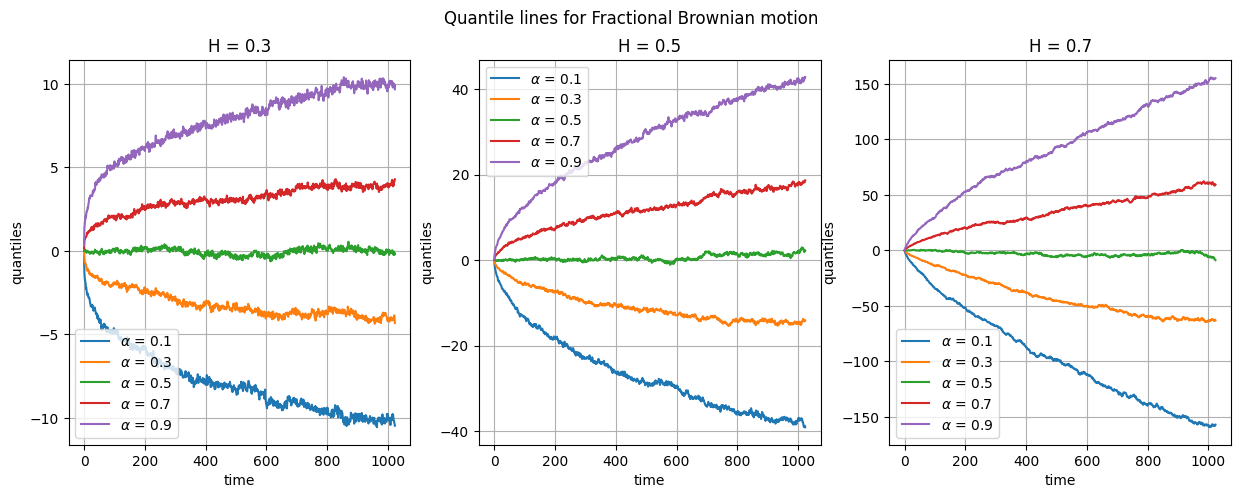

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time, fbm, H, alphas, "Fractional Brownian motion")

For Fractional Brownian motion variance in time is equal to $\sigma(t) = t^{2H}$.

The estimated variance in time is very close to the theoretical value.

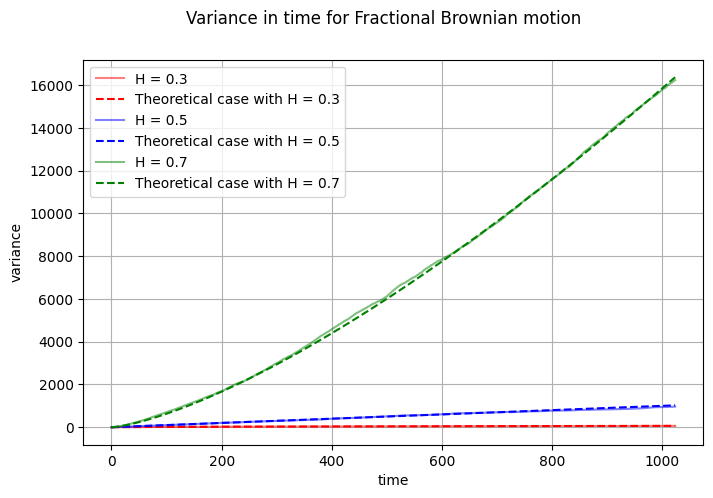

In [ ]:
plot_variance(time, fbm, H, "Fractional Brownian motion")

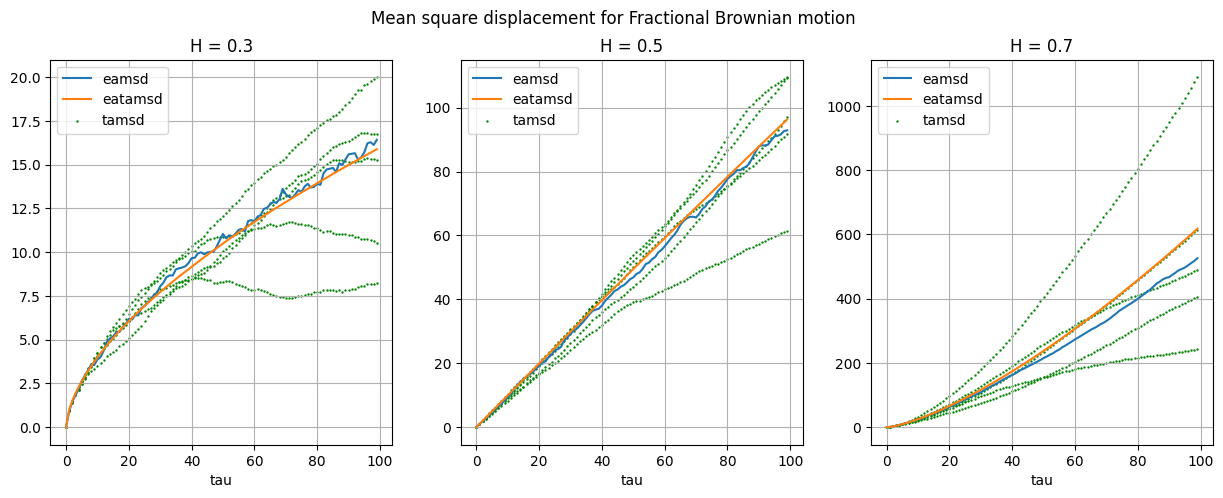

In [ ]:
plot_msd(fbm, H, "Fractional Brownian motion")

EAMSD is really close to the EATAMSD. For $H = 0.5$ the function is linear.

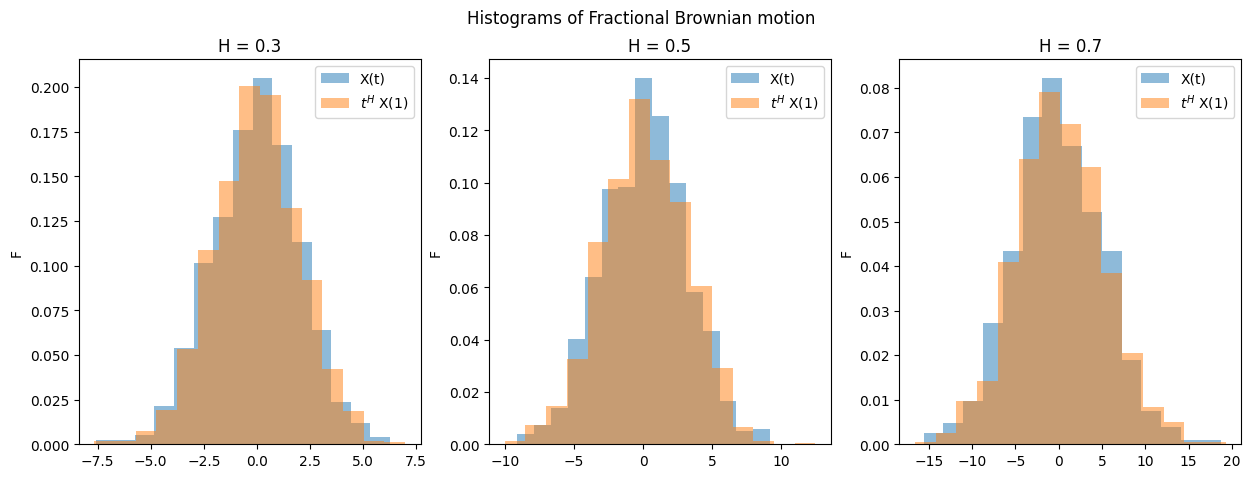

In [ ]:
self_similar(10, fbm, H, "Fractional Brownian motion")

Histograms are similar. Fractional Brownian motion is self-similar process.

To check the stationarity we will perform the ADF test with signifigance level $0.05$:
* $\mathbf{H_0}$: The time series is non-stationary.
* $\mathbf{H_1}$: The time series is stationary.

In [ ]:
adf_results = [[],[],[]]
for j in range(3):
    for i in range(1000):
        adf = adfuller(fbm[j][i])[1]
        adf_results[j].append(adf < 0.05)

In [ ]:
print("Fraction of trajectories which fails the ADF test (are sationary):")
for j in range(3):
    print(f"H = {H[j]}: {np.sum(adf_results[j])/1000}")

Fraction of trajectories which fails the ADF test (are sationary):
H = 0.3: 0.421
H = 0.5: 0.061
H = 0.7: 0.045


We reject the null hypothesis only for the 5% of the trajectories. Therefore we can assume that fractional Brownian motion is not stationary.

P value for KS test:
H = 0.3: 0.26347172719864703
H = 0.5: 0.43260886958153144
H = 0.7: 0.5362766985932181


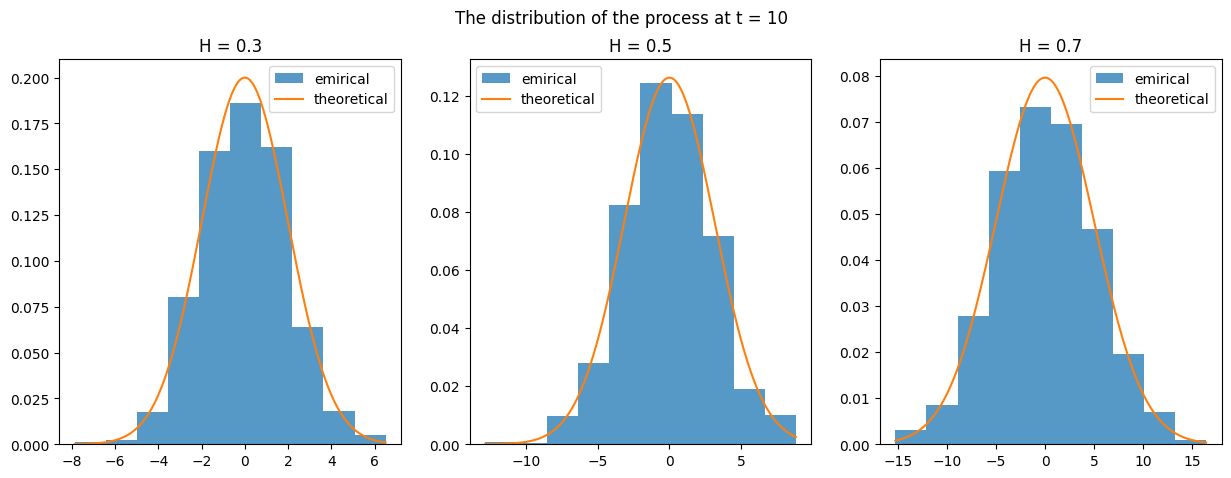

In [ ]:
t = 10
sigmas  = [t**h for h in H]
compare_with_normal(t,fbm,H,sigmas)

Fractional Brownian motion at time $t$ has normal distribution with mean $0$ and variance $t^{2H}$:
$$ B_H(t) \sim N(0,t^{2H}) $$

## Increments of Fractional Brownian motion

In [ ]:
fbm_incr = np.diff(fbm)

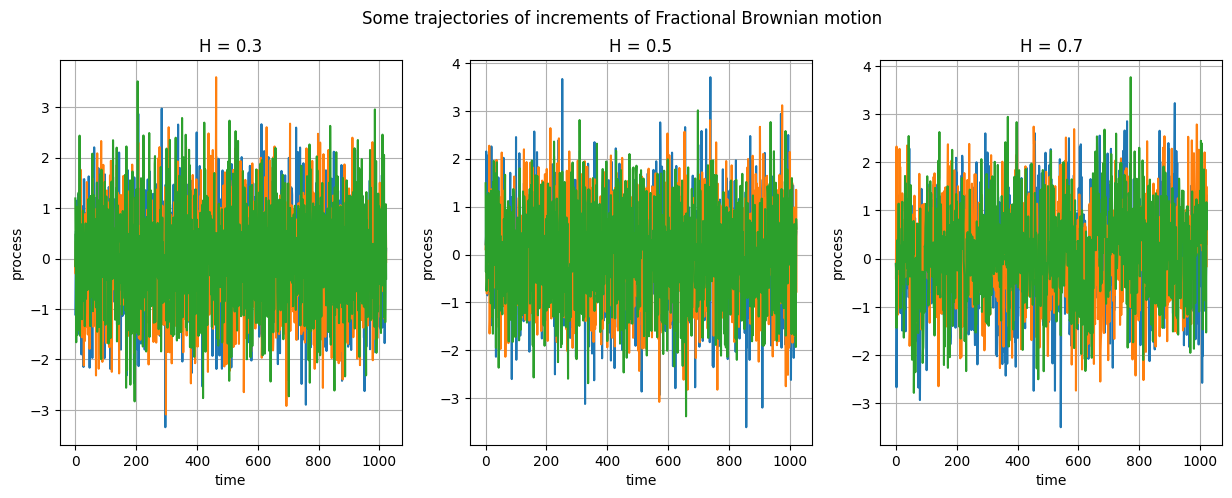

In [ ]:
H = [0.3, 0.5, 0.7]
plot_traj(time[:-1], fbm_incr[:,:3,:], H, "increments of Fractional Brownian motion")

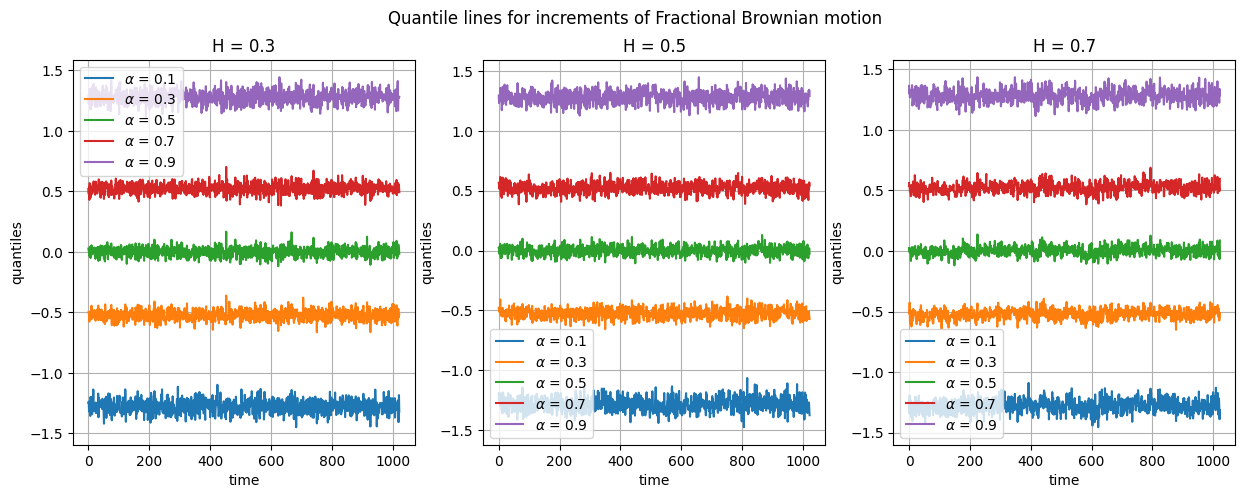

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time[:-1], fbm_incr, H, alphas, "increments of Fractional Brownian motion")

Increments of fractional Brownian motion is not self-similar process.

In [ ]:
adf_results = [[],[],[]]
for j in range(3):
    for i in range(1000):
        adf = adfuller(fbm_incr[j][i])[1]
        adf_results[j].append(adf < 0.05)

In [ ]:
print("Fraction of trajectories which fails the ADF test (are sationary):")
for j in range(3):
    print(f"H = {H[j]}: {np.sum(adf_results[j])/1000}")

Fraction of trajectories which fails the ADF test (are sationary):
H = 0.3: 1.0
H = 0.5: 1.0
H = 0.7: 1.0


For fractiolal Gaussian noise we reject the null hypotesis for all the trajectories. Therefore we can assume that the increments of fracional Brownian Motion are stationary.

P value for KS test:
H = 0.3: 0.6101664688189142
H = 0.5: 0.04839715079181246
H = 0.7: 0.8595454206943325


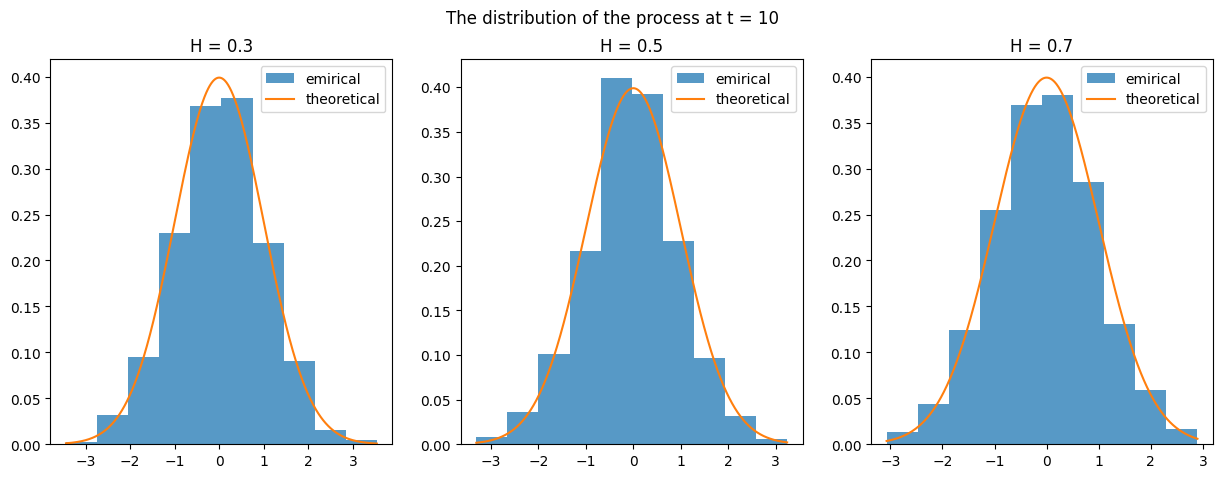

In [ ]:
dt = 1
t = 10
sigmas  = [dt**h for h in H]
compare_with_normal(t,fbm_incr,H,sigmas)

Fractional Gaussian noise at time $t$ has normal distribution with mean $0$ and variance $dt^{2H}$:
$$ b_H(t) \sim N(0,dt^{2H}) $$

Fractional Brownian motion:
1. The process is not stationary.
2. Increments of the process are stationary.
3. The distribution of the process in a fixed time is $N(0, t^{2H})$. The distribution of increments is $N(0, dt^{2H})$.
4. EATAMSD coincides with EAMSD.
5. The process is self-similar. Increments of the process are not self-similar.

# Fractional Ornstein-Uhlenbeck


We use Lamperti transformation to generate fractional Ornstein-Uhlenbeck.

If $\{X(t), \; t \geqslant 0 \}$ is an H-self-similar process then $\{Y(t), \; t \in \mathbb{R} \}$ defined as $Y(t) = e^{-Ht} X(e^t)$ is stationary.

In our case $X(t)$ - fractional Brownian motion and $Y(t)$ - fractional Ornstein-Uhlenbeck.

In [ ]:
def fou_gen(t, N, H):
  """
  Function to generate N independent fractional Ornstein-Uhlenbeck processes

  params
  ------
  t - list of time (list)
  N - number of simulations (int)
  H - self-similarity index (float)

  returns
  -------
  array of N independent fractional Ornstein-Uhlenbeck processes (np.array)
  """
  exp_t = np.exp(t)
  X = cholesky_gen(exp_t, Sigma_fbm, N = N, H = H)
  return np.exp(-H*t) * X

In [ ]:
N = 3
time = np.arange(0,200,0.1)

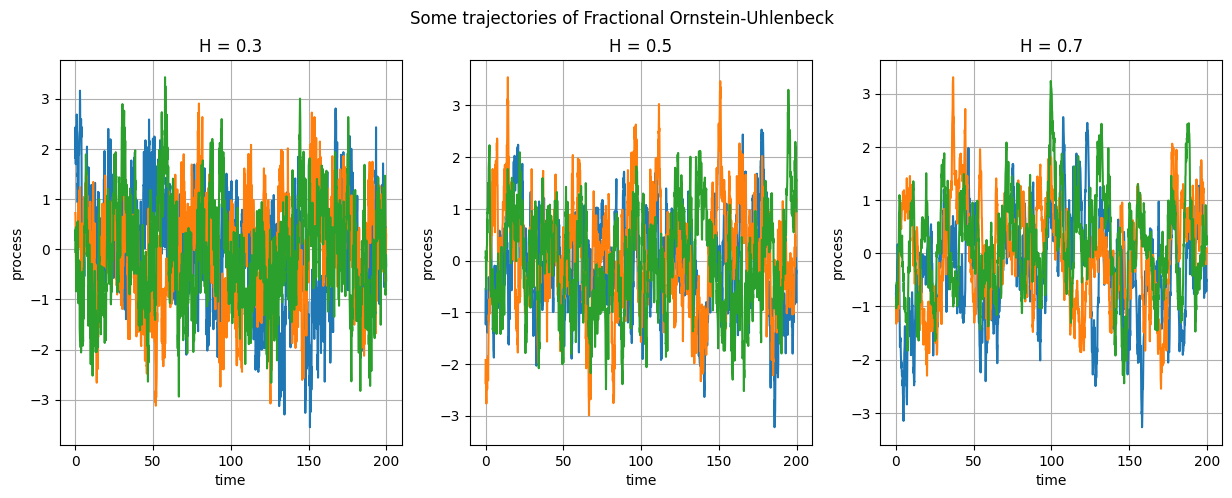

In [ ]:
fou = []
H = [0.3, 0.5, 0.7]
for h in H:
  fou.append(fou_gen(time, N = N, H = h))
plot_traj(time, fou, H, "Fractional Ornstein-Uhlenbeck")

In [ ]:
N = 1000
n = 2**8
time = np.arange(n)

In [ ]:
fou = []
H = [0.3, 0.5, 0.7]
for h in H:
  fou.append(fou_gen(time, N = N, H = h))

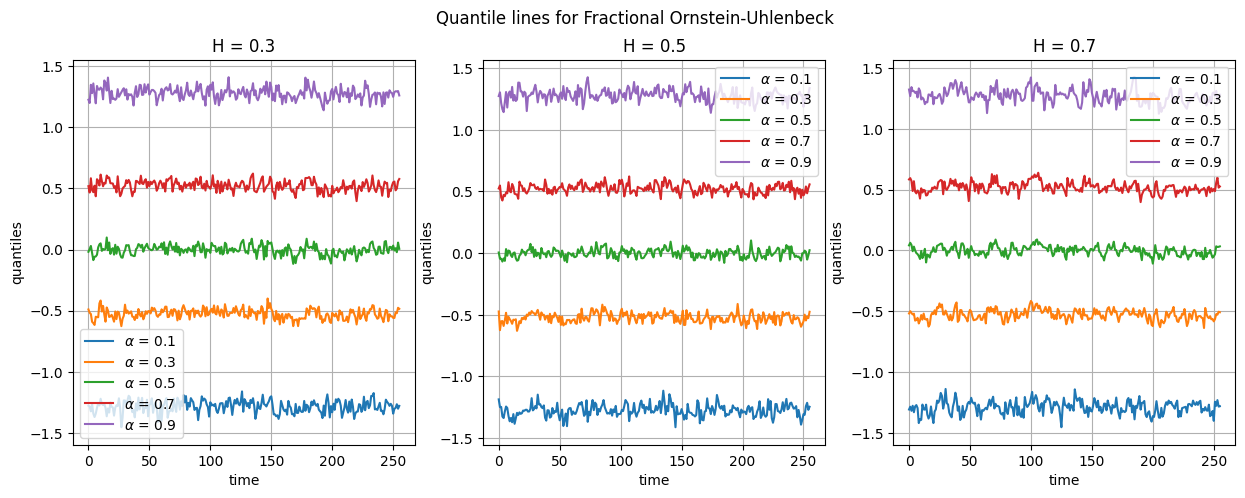

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time, fou, H, alphas, "Fractional Ornstein-Uhlenbeck")

Fractional Ornstein-Uhlenbeck process is not self-similar process.

For Fractional Ornstein-Uhlenbeck motion variance in time is equal to $\sigma(t) = 1$.

The estimated variance in time fluctuate near the theoretical values.

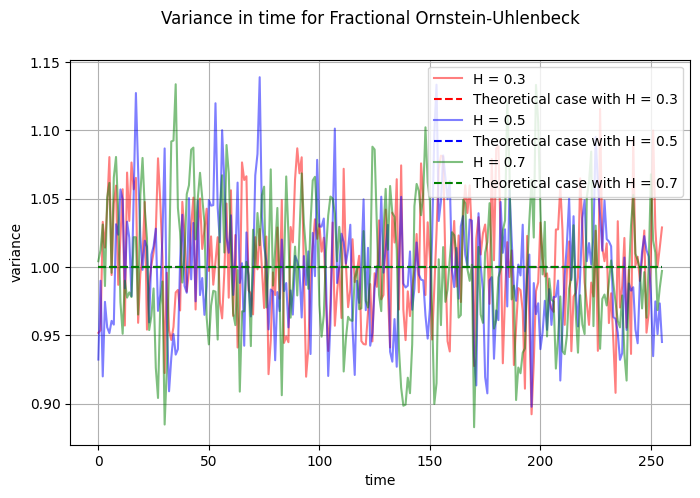

In [ ]:
plot_variance(time, fou, H, "Fractional Ornstein-Uhlenbeck")

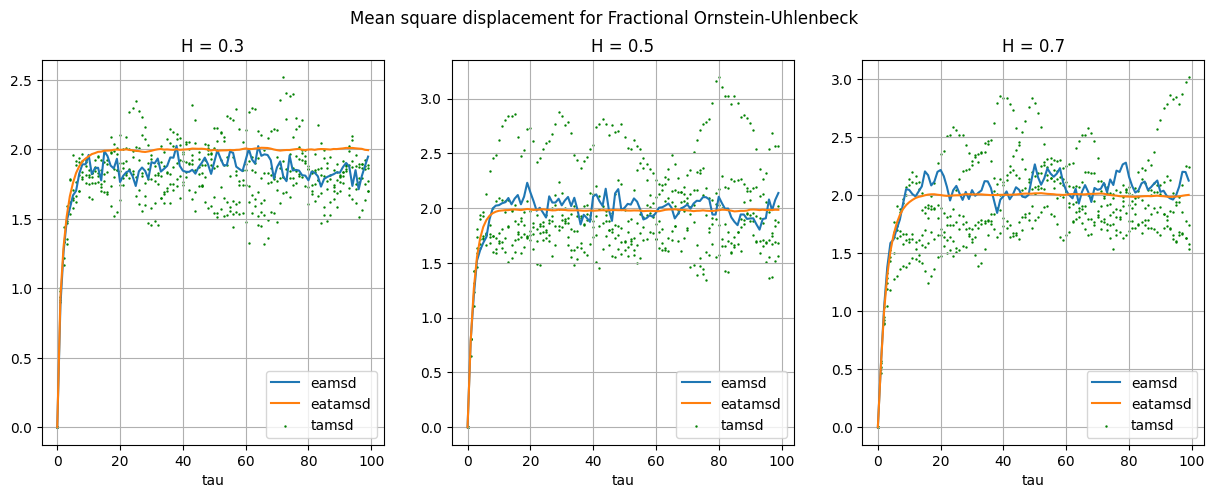

In [ ]:
plot_msd(fou, H, "Fractional Ornstein-Uhlenbeck")

EAMSD is really close to the EATAMSD.

In [ ]:
adf_results = [[],[],[]]
for j in range(3):
    for i in range(1000):
        adf = adfuller(fou[j][i])[1]
        adf_results[j].append(adf < 0.05)

In [ ]:
print("Fraction of trajectories which fails the ADF test (are sationary):")
for j in range(3):
    print(f"H = {H[j]}: {np.sum(adf_results[j])/1000}")

Fraction of trajectories which fails the ADF test (are sationary):
H = 0.3: 0.994
H = 0.5: 0.999
H = 0.7: 0.997


For Fractional Ornstein-Uhlenbeck we reject the null hypotesis for almost all the trajectories. Therefore we can assume that the process is stationary.

P value for KS test:
H = 0.3: 0.9690010280430694
H = 0.5: 0.16411447756429137
H = 0.7: 0.647814872077161


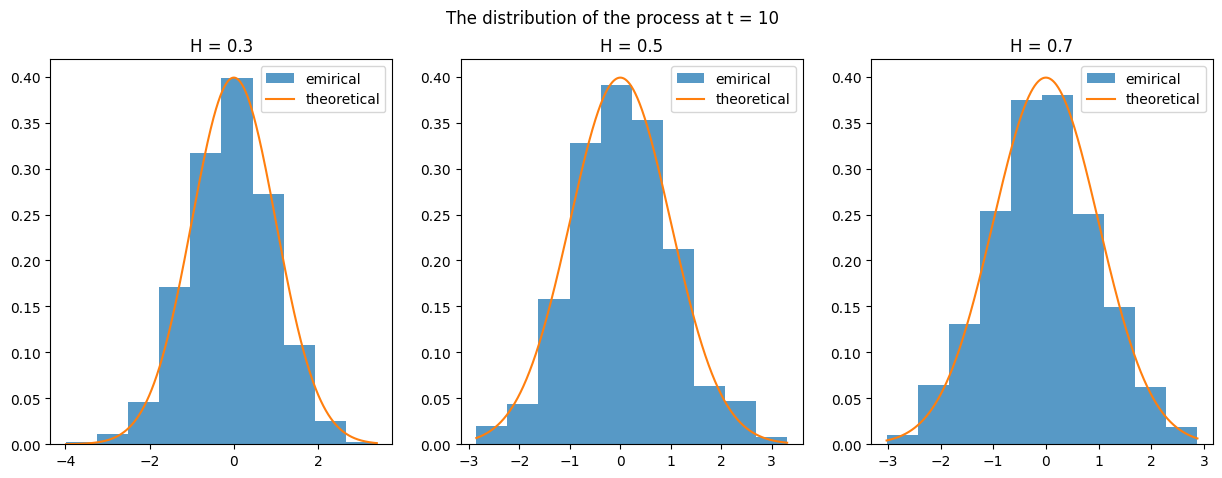

In [ ]:
dt = 0.1
t = 10
sigmas  = [1 for h in H]
compare_with_normal(t,fou,H,sigmas)

Fractional Ornstein-Uhlenbeck at time $t$ has normal distribution with mean $0$ and variance $1$:
$$ OU_H(t) \sim N(0,1)$$

## Increments of Fractional Ornstein-Uhlenbeck

In [ ]:
fou_incr = np.diff(fou)

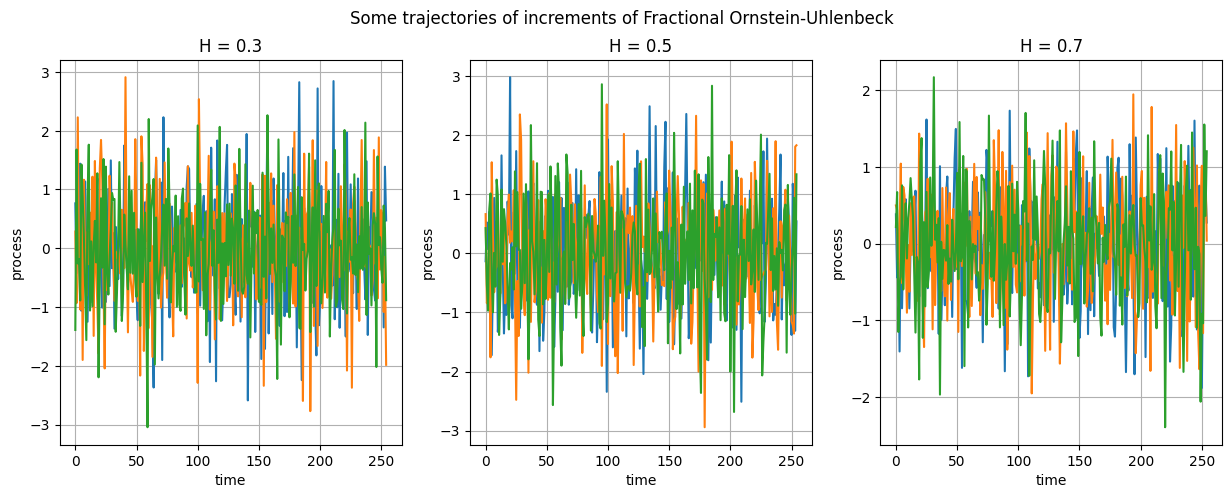

In [ ]:
H = [0.3, 0.5, 0.7]
plot_traj(time[:-1], fou_incr[:,:3,:], H, "increments of Fractional Ornstein-Uhlenbeck")

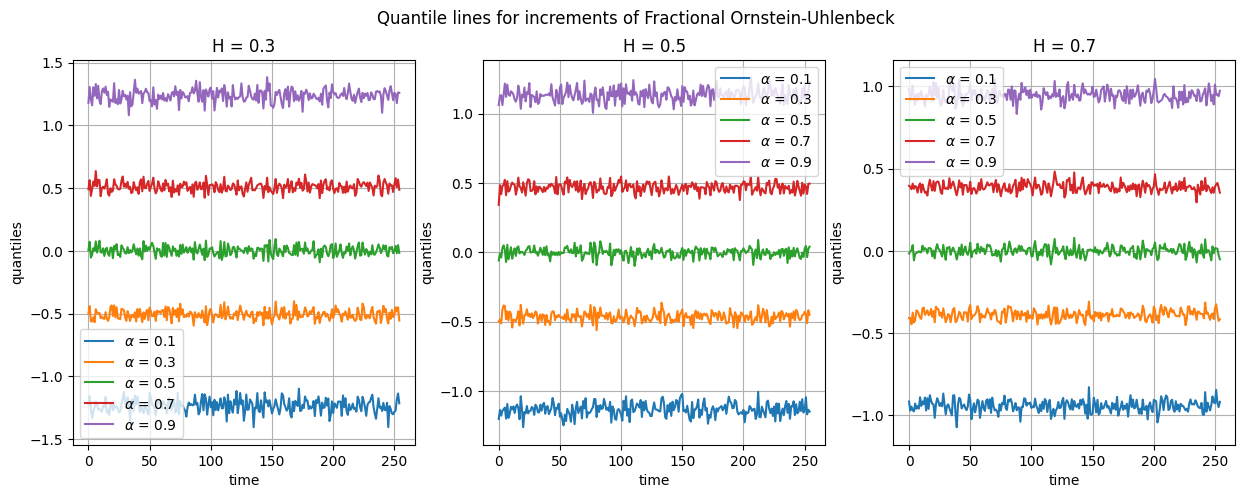

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time[:-1], fou_incr, H, alphas, "increments of Fractional Ornstein-Uhlenbeck")

Increments of fractional Ornstein-Uhlenbeck process is not self-similar process.

In [ ]:
adf_results = [[],[],[]]
for j in range(3):
    for i in range(1000):
        adf = adfuller(fou_incr[j][i])[1]
        adf_results[j].append(adf < 0.05)

In [ ]:
print("Fraction of trajectories which fails the ADF test (are sationary):")
for j in range(3):
    print(f"H = {H[j]}: {np.sum(adf_results[j])/1000}")

Fraction of trajectories which fails the ADF test (are sationary):
H = 0.3: 1.0
H = 0.5: 1.0
H = 0.7: 1.0


We reject the null hypotesis all the trajectories. Therefore we can assume that the increments of fractional Ornstein-Uhlenbeck process are stationary.

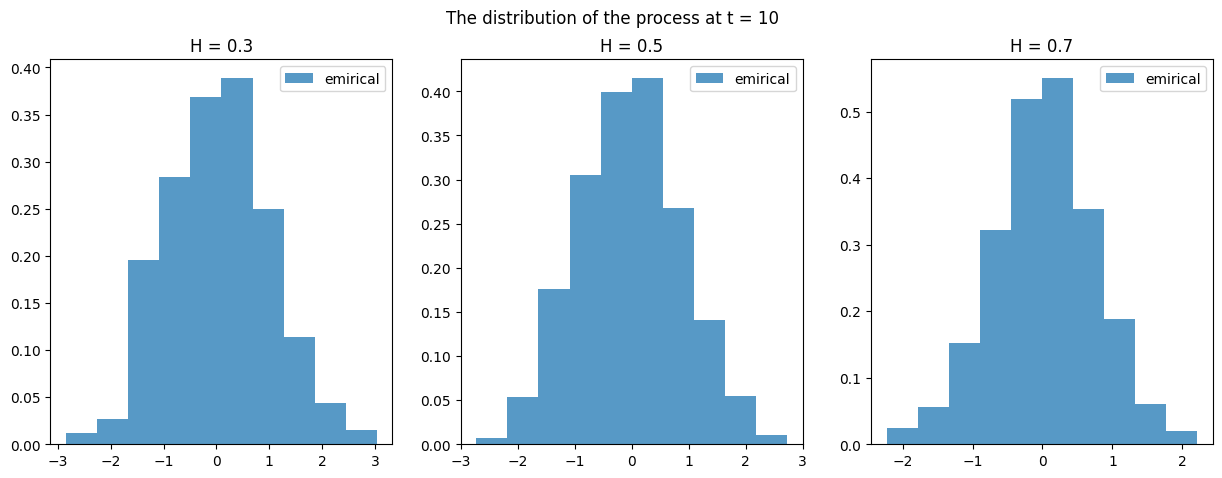

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    Y = fou_incr[i][:,t]
    x = np.linspace(min(Y),max(Y),1000)
    axes[i].hist(Y,density=True, alpha=0.75, label= "emirical")
    axes[i].set_title(f"H = {H[i]}")
    axes[i].legend()
plt.suptitle(f"The distribution of the process at t = {t}")
plt.show()

Increments of fractional Ornstein-Uhlenbeck have normal distribution.

Fractional Ornstein-Uhlenbeck process:
1. The process is stationary.
2. Increments of the process are stationary.
3. The distribution of the process in a fixed time is $N(0, 1)$. The distribution of increments is normal.
4. EATAMSD coincides with EAMSD.
5. The process is not self-similar. Increments of the process are not self-similar.

# Fractional Levy stable motion

In [ ]:
def alpha_stable_gen(alpha, beta, gamma, delta, n):
  """
  Function to generate independent alpha stable random variables

  params
  ------
  alpha - stability parameter (float)
  beta - skewness parameter (float)
  gamma - scale parameter (float)
  delta- location parameter (float)
  n - number of simulated independent random variables (int)

  returns
  -------
  array of length n of independent alpha stable random variables (np.array)
  """

  Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
  W = np.random.exponential(1, n)
  theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
  if alpha != 1:
      Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
      X = gamma * Z + delta
  else:
      Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
      X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
  return X

In [ ]:
def simulate_process(Z, n, delta):
  """
  Function to simulate process using the increments

  params
  ------
  Z - distribution of process (list)
  n - length of process (int)
  delta - coefficient for time intervalization: t_k = k * delta (float)

  returns
  -------
  array of length n of process (np.array)
  """
  X = [0]
  for k in range(n-1):
      X.append(X[k] + Z[k])
  return X

In [ ]:
def alpha_stable_process_gen(n, delta, alpha, beta):
  """
  Function to generate independent alpha stable random variables

  params
  ------
  n - length of process (int)
  delta - coefficient for time intervalization: t_k = k * delta (float)
  alpha - stability parameter (float)
  beta - skewness parameter (float)

  returns
  -------
  array of length n of alpha stable process (np.array)
  """
  gamma = delta**(1 / alpha)
  delt = 0
  Z = alpha_stable_gen(alpha, beta, gamma, delt, n)
  X = simulate_process(Z, n, delta)
  return X

We use integration and series representation for generation Fractional Levy stable motion.

Algorithm for $X(t) = \int_{-\infty}^{\infty} f_t (x) dZ_{\alpha} (x)$.

1. cut $(-\infty, \; \infty)$ to $(-M_1, \; M_2)$, e.g. $M_1 = 100$, $M_2 = T$;

2. consider $-M_1 = S_0 < S_1 < ... < S_I = M_2$ equally spaces: $X(t) = \sum_{i=0}^{I-1} f_t(S_i) (Z_{\alpha} (S_{i+1}) - Z_{\alpha} (S_i))$.

For Fractional Levy stable motion $f_t (X) = (t-x)_+^{H - \frac{1}{\alpha}} - (-x)_+^{H - \frac{1}{\alpha}}$, where $(x)_+ = \max(x, \; 0)$


In [ ]:
def f_flsm(x, t, H, alpha):
  """
  Function to calculate f_t(x) for Fractional Levy stable motion

  params
  ------
  x - the first point of time (float)
  t - the second point of time (float)
  H - self-similarity index (float)
  alpha - stability parameter (float)

  returns
  -------
  result of the function f_t(x) (float)
  """
  f = 0
  if t > x:
    f += (t - x)**(H - 1/alpha)
  if -x > 0:
    f -= (-x)**(H - 1/alpha)
  return f

In [ ]:
def simulate_flsm(M1, M2, I, t, N, H, alpha, beta):
  """
  Function to generate N independent fractional Levy stable motion processes

  params
  ------
  M1 - lower bound (float)
  M2 - upper bound (float)
  I - number of intervals (int)
  t - list of time (list)
  N - number of simulations (int)
  H - self-similarity index (float)
  alpha - stability parameter (float)
  beta - skewness parameter (float)

  returns
  -------
  array of N independent fractional Levy stable motions (np.array)
  """
  s = np.linspace(-M1, M2, I)
  all_flsn = []
  for n in range(N):
    Z = alpha_stable_process_gen(I, 1, alpha, beta)
    incr = np.diff(Z)
    X = np.zeros(len(t))
    for i, t_i in enumerate(t):
        for j, s_j in enumerate(s[:-1]):
            X[i] += f_flsm(s_j, t_i, H, alpha) * incr[j]
        X[i] = np.sum(X[i])
    all_flsn.append(X)
  return all_flsn

In [ ]:
T = 300
M1 = 100
M2 = T
I = M1 + M2 + 1
H = [0.3, 0.5, 0.7]
alpha = 1.5
beta = 0.5
time = np.linspace(0, T, T+1)
N = 5

In [ ]:
flsm = []
for h in H:
  flsm.append(simulate_flsm(M1, M2, I, time, N, h, alpha, beta))

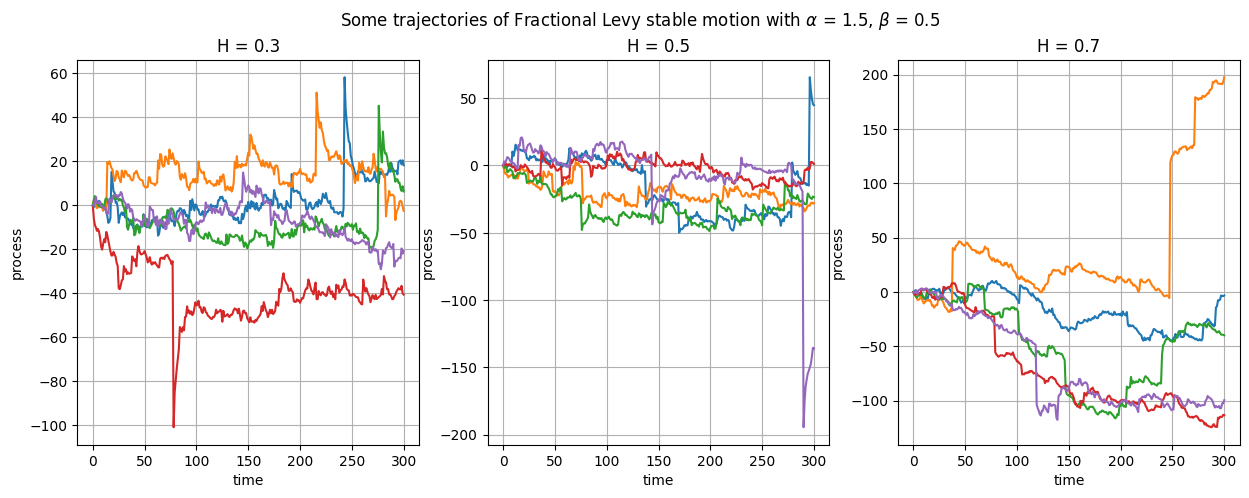

In [ ]:
plot_traj(time, flsm, H, rf"Fractional Levy stable motion with $\alpha$ = {alpha}, $\beta$ = {beta}")

In [ ]:
N = 1000
flsm = []
H = [0.3, 0.5, 0.7]
for h in H:
  flsm.append(simulate_flsm(M1, M2, I, time, N, h, alpha, beta))

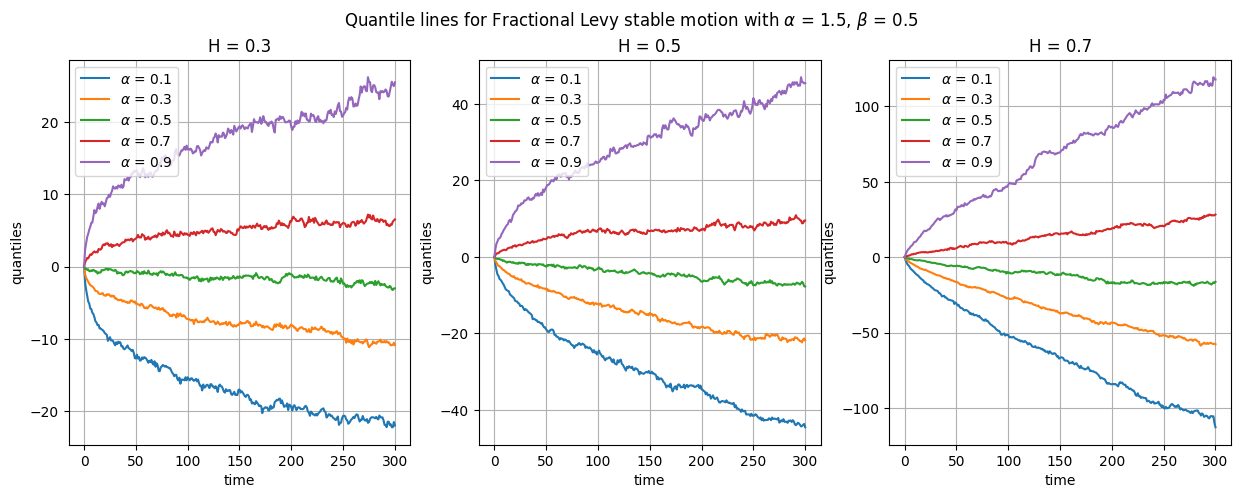

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time, flsm, H, alphas, rf"Fractional Levy stable motion with $\alpha$ = {alpha}, $\beta$ = {beta}")

Fractional Levy stable motion is self-similar process.

For Fractional Levy stable motion variance in time doesn't exist.

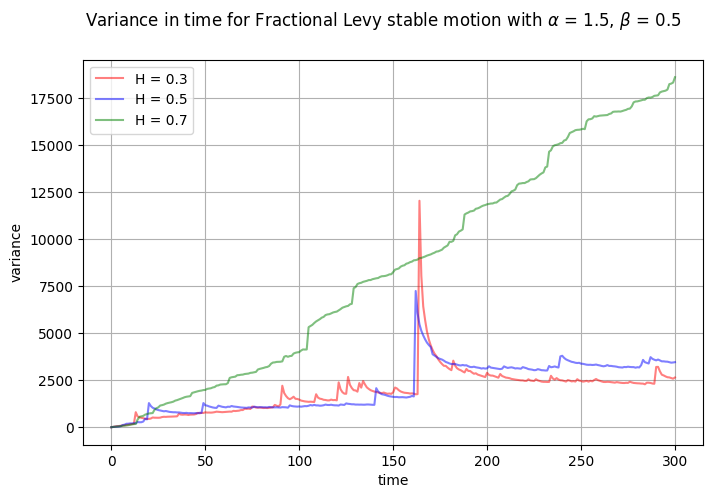

In [ ]:
plot_variance(time, flsm, H, rf"Fractional Levy stable motion with $\alpha$ = {alpha}, $\beta$ = {beta}")

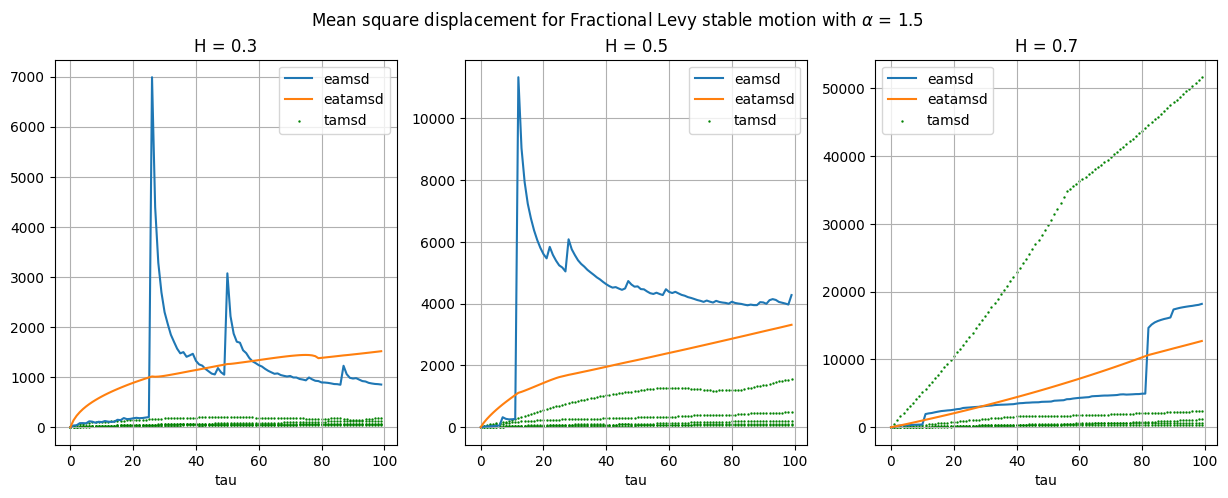

In [ ]:
plot_msd(flsm, H, rf"Fractional Levy stable motion with $\alpha$ = {alpha}")

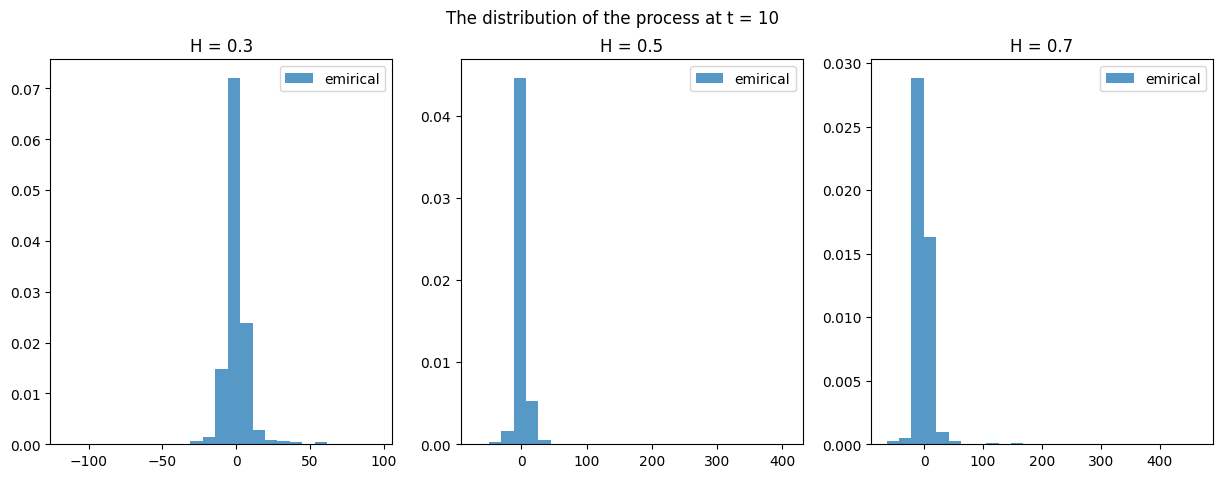

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    Y = np.array(flsm[i])[:,t]
    axes[i].hist(Y,density=True, alpha=0.75, label= "emirical",bins=25)
    axes[i].set_title(f"H = {H[i]}")
    axes[i].legend()
    # axes[i].set_xlim((-50,50))
plt.suptitle(f"The distribution of the process at t = {t}")
plt.show()

Fractional Levy stable motion at time has $\alpha$ stable distribution.

## Increments of Fractional Levy stable motion

In [ ]:
flsm_incr = np.diff(flsm)

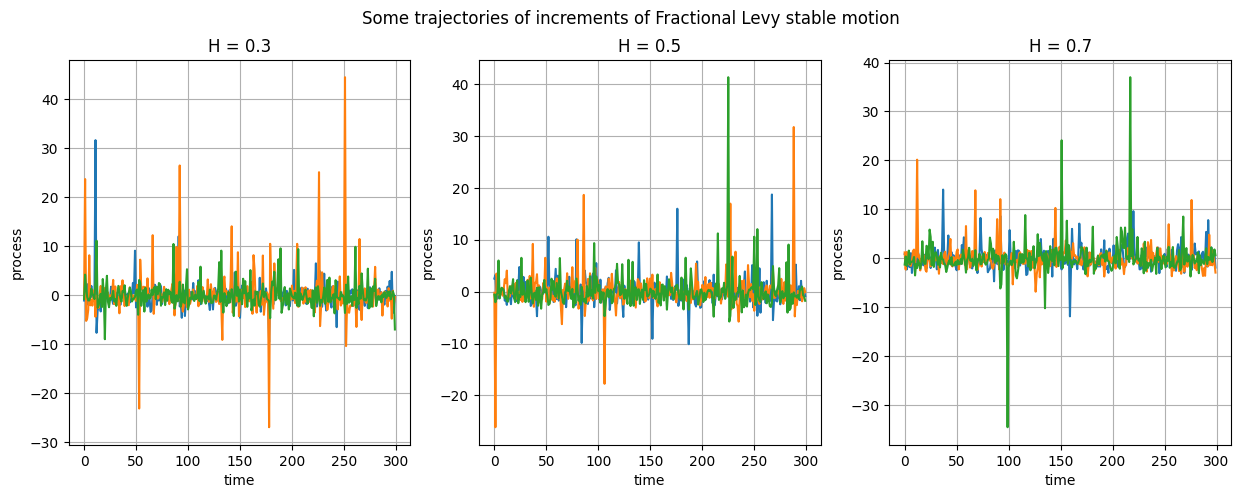

In [ ]:
H = [0.3, 0.5, 0.7]
plot_traj(time[:-1], flsm_incr[:,:3,:], H, "increments of Fractional Levy stable motion")

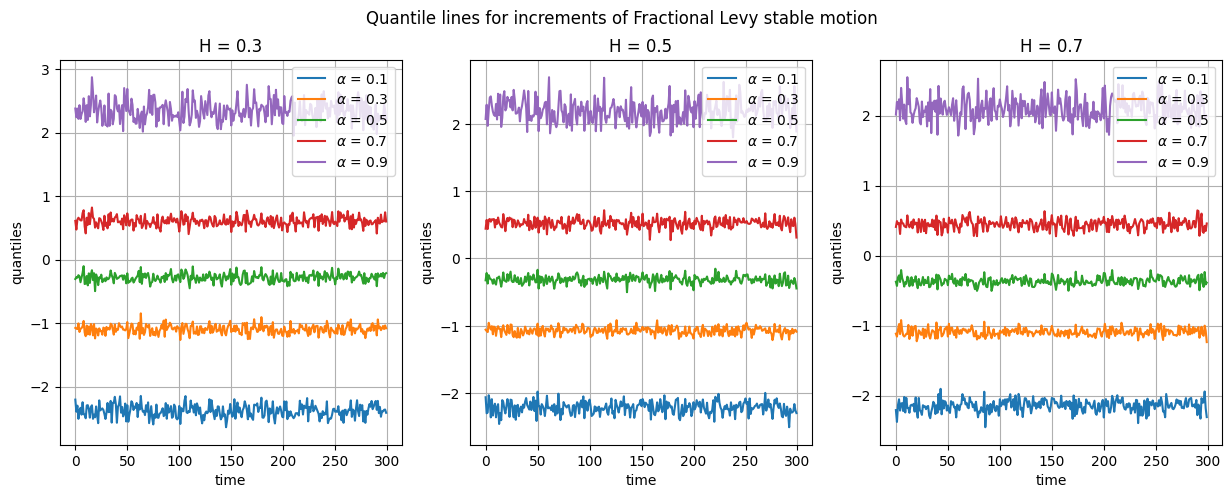

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
plot_quantile_lines(time[:-1], flsm_incr, H, alphas, "increments of Fractional Levy stable motion")

Increments of fractional Levy stable motion is not self-similar process.

In [ ]:
adf_results = [[],[],[]]
for j in range(3):
    for i in range(1000):
        adf = adfuller(flsm_incr[j][i])[1]
        adf_results[j].append(adf < 0.05)

In [ ]:
print("Fraction of trajectories which fails the ADF test (are sationary):")
for j in range(3):
    print(f"H = {H[j]}: {np.sum(adf_results[j])/1000}")

Fraction of trajectories which fails the ADF test (are sationary):
H = 0.3: 0.997
H = 0.5: 0.997
H = 0.7: 0.995


We reject the null hypotesis all the trajectories. Therefore we can assume that the increments of fractional Levy stable motion process are stationary.

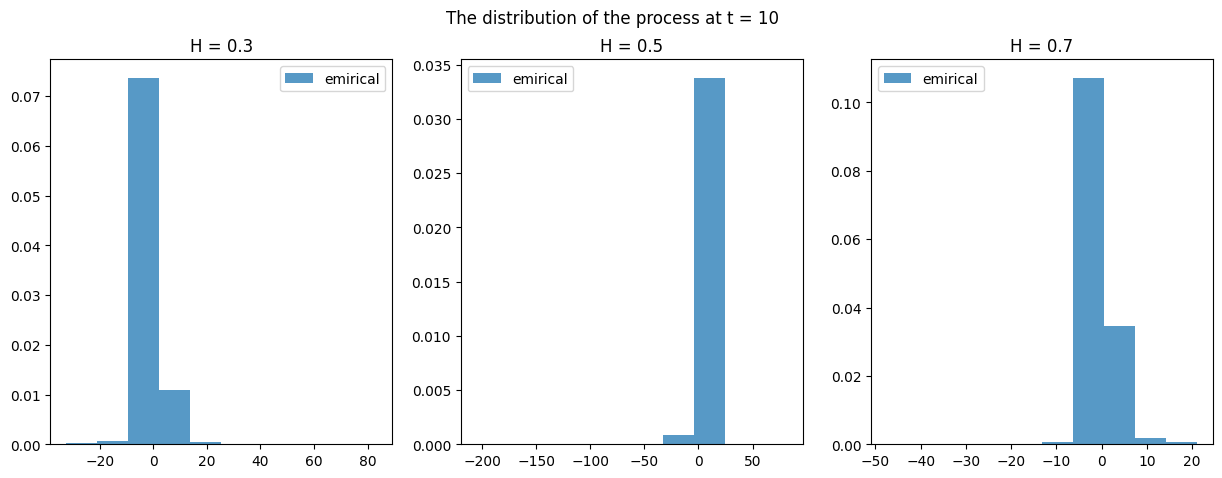

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    Y = flsm_incr[i][:,t]
    x = np.linspace(min(Y),max(Y),1000)
    axes[i].hist(Y,density=True, alpha=0.75, label= "emirical")
    axes[i].set_title(f"H = {H[i]}")
    axes[i].legend()
plt.suptitle(f"The distribution of the process at t = {t}")
plt.show()

Increments of fractional Levy stable motion at time has $\alpha$ stable distribution.

Fractional Levy stable motion:
1. The process is not stationary.
2. Increments of the process are stationary.
3. The distribution of the process in a fixed time is $\alpha$ stable . The distribution of increments is $\alpha$ stable .
4. EATAMSD does not coincide with EAMSD, because variance does not exist.
5. The process is self-similar. Increments of the process are not self-similar.

# 2. S$\alpha$S Levy process

For S$\alpha$S Levy process: $H = \frac{1}{\alpha}$, $\beta = 0$.

We simulate S$\alpha$S Levy process until the process is inside the interval. Calculate exit time.

In [ ]:
def exit_time(M1, M2, I, dt, N, alpha, x_0, a, b):
  """
  Function to generate N independent fractional Levy stable motion processes

  params
  ------
  M1 - lower bound (float)
  M2 - upper bound (float)
  I - number of intervals (int)
  dt - time step (float)
  N - number of simulations (int)
  alpha - stability parameter (float)
  x_0 - the first value of the process (float)
  a - lower bound (float)
  b - upper bound (float)

  returns
  -------
  array of exit times with information about which bound was intersected (np.array)
  """
  gamma = dt**(1 / alpha)
  delt = 0
  beta = 0
  n = 1
  H = 1 / alpha
  s = np.linspace(-M1, M2, I)

  tau = []
  for i in range(N):
    X = x_0
    t = 0
    while True:
      if X >= b:
        tau.append([t, 1])
        break
      elif X <= a:
        tau.append([t, 0])
        break
      else:

        for s_j in s[:-1]:
          Z = alpha_stable_gen(alpha, beta, gamma, delt, n)
          X += f_flsm(s_j, t, H, alpha) * Z[0]
      t += dt
  tau = np.array(tau)
  return tau

In [ ]:
def expected_time(tau):
  """
  Function to calculate the expected time to exit

  params
  ------
  tau - list of exit times (np.array)

  returns
  -------
  expected time to exit (float)
  """
  return np.mean(tau.T[0])

In [ ]:
def probability_b(tau):
  """
  Function to calculate the probability that the exit happened through b

  params
  ------
  tau - list of exit times (np.array)

  returns
  -------
  probability that the exit happened through b  (float)
  """
  return np.mean(tau.T[1])

In [ ]:
M1 = 100
M2 = 100
I = M1 + M2
dt = 1
N = 100
a = -20
b = 20

In [ ]:
alpha = [0.5, 1, 1.5]
x_0  = np.linspace(a, b, 500)

In [ ]:
ext_05 = []
ext_1 = []
ext_15 = []

pr_05 = []
pr_1 = []
pr_15 = []

for x0 in x_0:
  print(x0)
  tau_05 = exit_time(M1, M2, I, dt, N, alpha[0], x0, a, b)
  tau_1 = exit_time(M1, M2, I, dt, N, alpha[1], x0, a, b)
  tau_15 = exit_time(M1, M2, I, dt, N, alpha[2], x0, a, b)

  ext_05.append(expected_time(tau_05))
  ext_1.append(expected_time(tau_1))
  ext_15.append(expected_time(tau_15))

  pr_05.append(probability_b(tau_05))
  pr_1.append(probability_b(tau_1))
  pr_15.append(probability_b(tau_15))

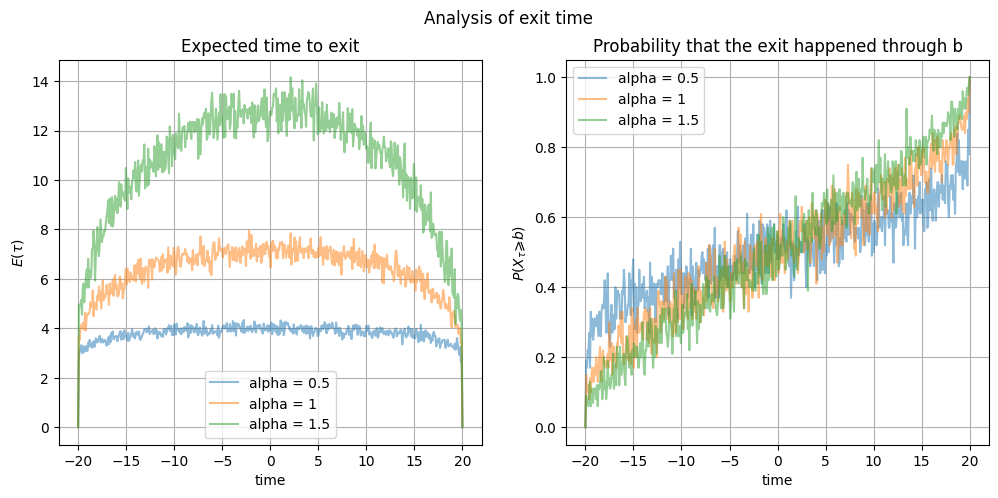

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))
plt.suptitle(f"Analysis of exit time")

axes[0].set_title(f"Expected time to exit")
axes[0].set_ylabel(r"$E(\tau)$")
axes[0].plot(x_0, ext_05, label = rf"alpha = {alpha[0]}", alpha = 0.5)
axes[0].plot(x_0, ext_1, label = rf"alpha = {alpha[1]}", alpha = 0.5)
axes[0].plot(x_0, ext_15, label = rf"alpha = {alpha[2]}", alpha = 0.5)

axes[1].set_title(f"Probability that the exit happened through b")
axes[1].set_ylabel(r"$P(X_{\tau} \geqslant b)$")
axes[1].plot(x_0, pr_05, label = rf"alpha = {alpha[0]}", alpha = 0.5)
axes[1].plot(x_0, pr_1, label = rf"alpha = {alpha[1]}", alpha = 0.5)
axes[1].plot(x_0, pr_15, label = rf"alpha = {alpha[2]}", alpha = 0.5)

for i in range(2):
  axes[i].set_xlabel("time")
  axes[i].grid()
  axes[i].legend()

plt.show()

For the expected time to exit: the less $\alpha$, the fewer values for the expected time to exit we have.

For the probability that the exit happened through b: the larger $\alpha$, the more linear plot we get.